In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from sklearn.metrics import f1_score

In [ ]:
df = pd.read_csv("") # logs_<>.csv file for next activity prediction

df["prefix"] = df["prefix"].apply(ast.literal_eval)
df["trace"] = df["trace"].apply(ast.literal_eval)
df["all_true_labels"] = df["all_true_labels"].apply(ast.literal_eval)
df["unique_activities"] = df["unique_activities"].apply(ast.literal_eval)

In [ ]:
def correct_label(row):
    if row["is_multichoice"]:
        if row["is_correct"]:
            return row["true_label"]  # Correct prediction
        else:
            return row["prediction"]
    else:
        return row["prediction"]

df["pred_label_fixed"] = df.apply(correct_label, axis=1)

In [4]:
df["true_label"] = df["true_label"].astype(str)
df["pred_label_fixed"] = df["pred_label_fixed"].astype(str)

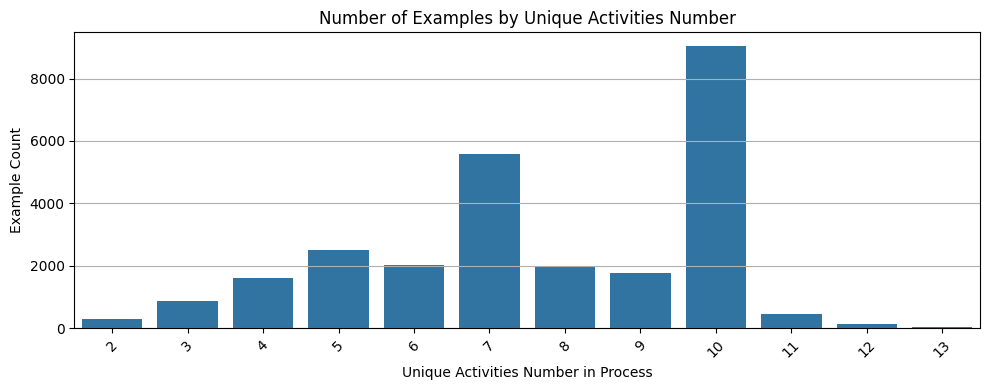

In [10]:
df["num_unique_activities"] = df["unique_activities"].apply(len)

plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="num_unique_activities", order=sorted(df["num_unique_activities"].unique()))


plt.title("Number of Examples by Unique Activities Number")
plt.xlabel("Unique Activities Number in Process")
plt.ylabel("Example Count")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

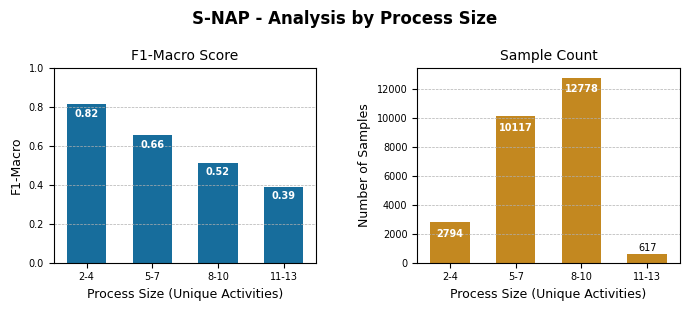

In [ ]:
# plot: S-NAP - Analysis by Process Size

pastel_palette = sns.color_palette("colorblind")

df["num_unique_activities"] = df["unique_activities"].apply(len)
df["process_size_bucket"] = pd.cut(
    df["num_unique_activities"],
    bins=[1, 4, 7, 10, 13],  # Adjust if needed
    labels=["2-4", "5-7", "8-10", "11-13"]
)

f1_records = []

for bucket in df["process_size_bucket"].cat.categories:
    group = df[df["process_size_bucket"] == bucket]
    if group["true_label"].nunique() > 1 and group["prediction"].nunique() > 1:
        f1 = f1_score(group["true_label"], group["pred_label_fixed"], average='macro', zero_division=0)
    else:
        f1 = float("nan")
    f1_records.append({
        "process_size_bucket": bucket,
        "f1_score": f1,
        "count": len(group)
    })

f1_df = pd.DataFrame(f1_records)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3))  # Compact but slightly wider
fig.suptitle("S-NAP - Analysis by Process Size", fontsize=12, weight="bold", y=1.02)

# Left plot: F1 Scores
sns.barplot(data=f1_df, x="process_size_bucket", y="f1_score", ax=ax1, color=pastel_palette[0], width=0.6)

for p in ax1.patches:
    height = p.get_height()
    if not pd.isna(height) and height >= 0:
        if height > 0.15:
            ax1.annotate(f"{height:.2f}",
                         (p.get_x() + p.get_width() / 2., height - 0.05),
                         ha='center', va='center', fontsize=7, color="white", weight="bold")
        else:
            ax1.annotate(f"{height:.2f}",
                         (p.get_x() + p.get_width() / 2., height + 0.02),
                         ha='center', va='bottom', fontsize=7, color="blue")

ax1.set_title("F1-Macro Score", fontsize=10)
ax1.set_ylabel("F1-Macro", fontsize=9)
ax1.set_xlabel("Process Size (Unique Activities)", fontsize=9)
ax1.set_ylim(0, 1)
ax1.grid(axis="y", linestyle="--", linewidth=0.5)
ax1.tick_params(axis='both', labelsize=7)

# Right plot: Sample Counts
sns.barplot(data=f1_df, x="process_size_bucket", y="count", ax=ax2, color=pastel_palette[1], width=0.6)

for p in ax2.patches:
    height = p.get_height()
    if not pd.isna(height) and height >= 0:
        if height > 1000:
            ax2.annotate(f"{int(height)}",
                         (p.get_x() + p.get_width() / 2., height - 800),
                         ha='center', va='center', fontsize=7, color="white", weight="bold")
        else:
            ax2.annotate(f"{int(height)}",
                         (p.get_x() + p.get_width() / 2., height + 50),
                         ha='center', va='bottom', fontsize=7, color="black")

ax2.set_title("Sample Count", fontsize=10)
ax2.set_ylabel("Number of Samples", fontsize=9)
ax2.set_xlabel("Process Size (Unique Activities)", fontsize=9)
ax2.grid(axis="y", linestyle="--", linewidth=0.5)
ax2.tick_params(axis='both', labelsize=7)

plt.tight_layout(rect=[0, 0, 1, 1.05], w_pad=3)
plt.show()


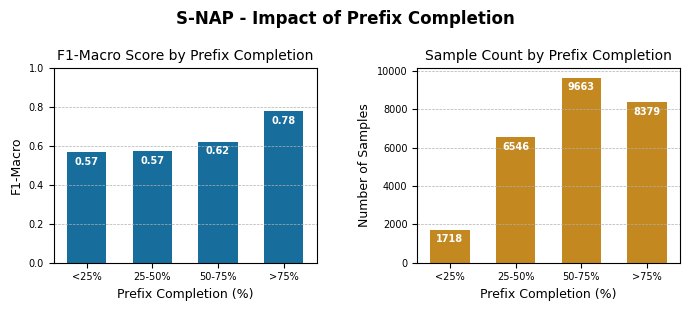

In [ ]:
# plot: S-NAP - Impact of Prefix Completion

pastel_palette = sns.color_palette("colorblind")

df["prefix_completion"] = df["prefix"].apply(len) / df["trace"].apply(len)
df["prefix_completion_bin"] = pd.cut(
    df["prefix_completion"],
    bins=[0, 0.25, 0.5, 0.75, 1],
    labels=["<25%", "25-50%", "50-75%", ">75%"]
)

f1_records = []

for bin_ in df["prefix_completion_bin"].cat.categories:
    group = df[df["prefix_completion_bin"] == bin_]
    if group["true_label"].nunique() > 1 and group["prediction"].nunique() > 1:
        f1 = f1_score(group["true_label"], group["pred_label_fixed"], average='macro', zero_division=0)
    else:
        f1 = float("nan")
    f1_records.append({
        "prefix_completion_bin": bin_,
        "f1_score": f1,
        "count": len(group)
    })

f1_df = pd.DataFrame(f1_records)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3))
fig.suptitle("S-NAP - Impact of Prefix Completion", fontsize=12, weight="bold", y=1.02)

# Left plot: F1 Scores
sns.barplot(data=f1_df, x="prefix_completion_bin", y="f1_score", ax=ax1, color=pastel_palette[0], width=0.6)

for p in ax1.patches:
    height = p.get_height()
    if not pd.isna(height) and height >= 0:
        if height > 0.15:
            ax1.annotate(f"{height:.2f}",
                         (p.get_x() + p.get_width() / 2., height - 0.05),
                         ha='center', va='center', fontsize=7, color="white", weight="bold")
        else:
            ax1.annotate(f"{height:.2f}",
                         (p.get_x() + p.get_width() / 2., height + 0.02),
                         ha='center', va='bottom', fontsize=7, color="blue")

ax1.set_title("F1-Macro Score by Prefix Completion", fontsize=10)
ax1.set_ylabel("F1-Macro", fontsize=9)
ax1.set_xlabel("Prefix Completion (%)", fontsize=9)
ax1.set_ylim(0, 1)
ax1.grid(axis="y", linestyle="--", linewidth=0.5)
ax1.tick_params(axis='both', labelsize=7)

# Right plot: Sample Counts
sns.barplot(data=f1_df, x="prefix_completion_bin", y="count", ax=ax2, color=pastel_palette[1], width=0.6)

for p in ax2.patches:
    height = p.get_height()
    if not pd.isna(height) and height >= 0:
        if height > 500:
            ax2.annotate(f"{int(height)}",
                         (p.get_x() + p.get_width() / 2., height - 500),
                         ha='center', va='center', fontsize=7, color="white", weight="bold")
        else:
            ax2.annotate(f"{int(height)}",
                         (p.get_x() + p.get_width() / 2., height + 50),
                         ha='center', va='bottom', fontsize=7, color="red")

ax2.set_title("Sample Count by Prefix Completion", fontsize=10)
ax2.set_ylabel("Number of Samples", fontsize=9)
ax2.set_xlabel("Prefix Completion (%)", fontsize=9)
ax2.grid(axis="y", linestyle="--", linewidth=0.5)
ax2.tick_params(axis='both', labelsize=7)

plt.tight_layout(rect=[0, 0, 1, 1.05], w_pad=3)
plt.show()


In [ ]:
# --- Step 1: Load Datasets ---
activity_anomaly_path = "" # logs_<>.csv file for activity anomaly
trace_anomaly_path = "" # logs_<>.csv file for trace anomaly
next_activity_path = "" # logs_<>.csv file for next activity prediction
domain_confidence_path = "classified_domains.csv"

# Load
orig_activity_df = pd.read_csv(activity_anomaly_path)
orig_trace_df = pd.read_csv(trace_anomaly_path)
orig_next_activity_df = pd.read_csv(next_activity_path)
domain_df = pd.read_csv(domain_confidence_path)

# merge with Domain Info
orig_activity_df = orig_activity_df.merge(domain_df, on="id", how="inner")
orig_trace_df = orig_trace_df.merge(domain_df, on="id", how="inner")
orig_next_activity_df = orig_next_activity_df.merge(domain_df, on="id", how="inner")

In [ ]:
# filter by confidence_score > 0.3
activity_df = orig_activity_df[orig_activity_df["confidence_score"] > 0.3]
trace_df = orig_trace_df[orig_trace_df["confidence_score"] > 0.3]
next_activity_df = orig_next_activity_df[orig_next_activity_df["confidence_score"] > 0.3]

def compute_anomaly_f1_per_domain(df, task_name):
    f1_records = []
    for domain, group in df.groupby("domain"):
        f1 = f1_score(group["true_label"], group["prediction"], average='macro', zero_division=0)
        sample_count = len(group)
        f1_records.append({
            "Domain": domain,
            "F1-Macro": f1,
            "Sample Count": sample_count,
            "Task": task_name
        })
    return pd.DataFrame(f1_records)

def compute_next_activity_f1_per_domain(df):
    # Fix predictions based on is_multichoice and is_correct
    df["true_label"] = df["true_label"].astype(str)
    df["prediction"] = df["prediction"].astype(str)

    def correct_label(row):
        if row["is_multichoice"]:
            if row["is_correct"]:
                return row["true_label"]
            else:
                return row["prediction"]
        else:
            return row["prediction"]

    df["pred_label_fixed"] = df.apply(correct_label, axis=1)
    df["pred_label_fixed"] = df["pred_label_fixed"].astype(str)

    f1_records = []
    for domain, group in df.groupby("domain"):
        f1 = f1_score(group["true_label"], group["pred_label_fixed"], average='macro', zero_division=0)
        sample_count = len(group)
        f1_records.append({
            "Domain": domain,
            "F1-Macro": f1,
            "Sample Count": sample_count,
            "Task": "S-NAP"
        })
    return pd.DataFrame(f1_records)

activity_f1 = compute_anomaly_f1_per_domain(activity_df, task_name="A-SAD")
trace_f1 = compute_anomaly_f1_per_domain(trace_df, task_name="T-SAD")
next_activity_f1 = compute_next_activity_f1_per_domain(next_activity_df)

final_f1_df = pd.concat([activity_f1, trace_f1, next_activity_f1])


/tmp/ipykernel_3557927/3809156491.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["true_label"] = df["true_label"].astype(str)
/tmp/ipykernel_3557927/3809156491.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["prediction"] = df["prediction"].astype(str)
/tmp/ipykernel_3557927/3809156491.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [ ]:
baseline_f1 = {}
baseline_f1["A-SAD"] = f1_score(orig_activity_df["true_label"], orig_activity_df["prediction"], average="macro", zero_division=0)
baseline_f1["T-SAD"] = f1_score(orig_trace_df["true_label"], orig_trace_df["prediction"], average="macro", zero_division=0)

def correct_label(row):
    if row["is_multichoice"]:
        if row["is_correct"]:
            return row["true_label"]
        else:
            return row["prediction"]
    else:
        return row["prediction"]

orig_next_activity_df["true_label"] = orig_next_activity_df["true_label"].astype(str)
orig_next_activity_df["prediction"] = orig_next_activity_df["prediction"].astype(str)
orig_next_activity_df["pred_label_fixed"] = orig_next_activity_df.apply(correct_label, axis=1)
orig_next_activity_df["pred_label_fixed"] = orig_next_activity_df["pred_label_fixed"].astype(str)

baseline_f1["S-NAP"] = f1_score(orig_next_activity_df["true_label"], orig_next_activity_df["pred_label_fixed"], average="macro", zero_division=0)

print("Baseline F1 scores:", baseline_f1)

/tmp/ipykernel_3557927/3839376065.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_3557927/3839376065.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


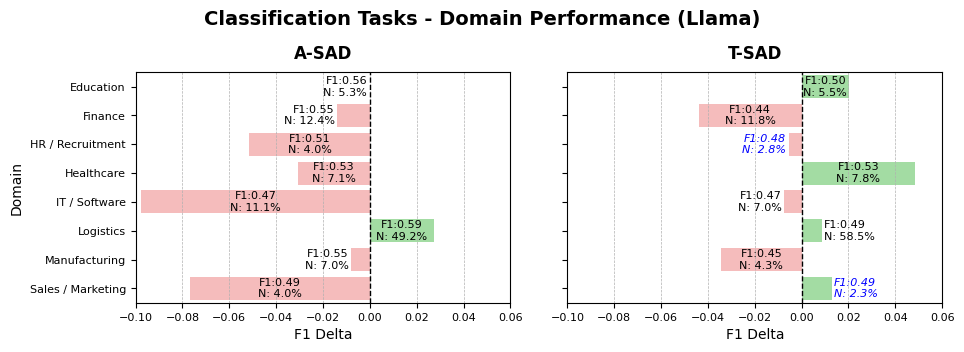

In [ ]:
# plot: Classification Tasks - Domain Performance (Llama) (pt.1)

# Compute F1 Delta
final_f1_df["F1-Delta"] = final_f1_df.apply(
    lambda row: row["F1-Macro"] - baseline_f1[row["Task"]],
    axis=1
)

tasks = final_f1_df["Task"].unique()[:2]

fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

for ax, task in zip(axes, tasks):
    task_df = final_f1_df[final_f1_df["Task"] == task].dropna().sort_values("Domain")
    colors = [(0.6, 0.9, 0.6) if delta >= 0 else (1.0, 0.7, 0.7) for delta in task_df["F1-Delta"]]

    sns.barplot(
        data=task_df,
        y="Domain",
        x="F1-Delta",
        palette=colors,
        orient="h",
        ax=ax
    )
    
    ax.axvline(0, color='black', linestyle='--', linewidth=1)
    ax.set_xlim(-0.1, 0.06)

    total_samples = task_df["Sample Count"].sum()

    for idx, p in enumerate(ax.patches):
        domain = task_df.iloc[idx]["Domain"]
        f1_macro = task_df.iloc[idx]["F1-Macro"]
        sample_count = task_df.iloc[idx]["Sample Count"]

        sample_percentage = (sample_count / total_samples) * 100

        if sample_percentage < 3:
            sample_style = 'oblique'
            sample_color = "blue"
        else:
            sample_style = 'normal'
            sample_color = "black"

        label_text = f"F1:{f1_macro:.2f}\nN: {sample_percentage:.1f}%"

        if abs(p.get_width()) < 0.02:
            ax.annotate(
                label_text,
                (p.get_width() + 0.001 if p.get_width() >= 0 else p.get_width() - 0.001, p.get_y() + p.get_height() / 2),
                ha='left' if p.get_width() > 0 else 'right',
                va='center',
                fontsize=8,
                color=sample_color,
                fontstyle=sample_style
            )
        else:
            ax.annotate(
                label_text,
                (p.get_width() / 2, p.get_y() + p.get_height() / 2),
                ha='center',
                va='center',
                fontsize=8,
                color=sample_color,
                fontstyle=sample_style
            )

    ax.set_title(task, fontsize=12, weight="bold", pad=10)
    ax.set_xlabel("F1 Delta", fontsize=10)
    ax.set_ylabel("") 
    ax.grid(axis="x", linestyle="--", linewidth=0.5)
    ax.tick_params(axis='both', labelsize=8)

axes[0].set_ylabel("Domain", fontsize=10) 

fig.suptitle("Classification Tasks - Domain Performance (Llama)", fontsize=14, weight="bold", y=0.9)
plt.tight_layout(pad=2)
plt.show()


/tmp/ipykernel_3315155/59047700.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


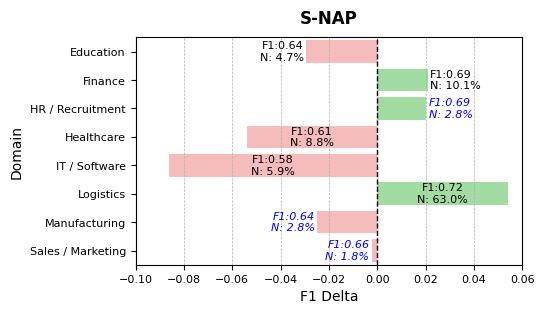

In [ ]:
# plot: Classification Tasks - Domain Performance (Llama) (pt.2)

third_task = final_f1_df["Task"].unique()[2]
fig, ax = plt.subplots(figsize=(5.8, 3.5))
task_df = final_f1_df[final_f1_df["Task"] == third_task].dropna().sort_values("Domain")
colors = [(0.6, 0.9, 0.6) if delta >= 0 else (1.0, 0.7, 0.7) for delta in task_df["F1-Delta"]]

sns.barplot(
    data=task_df,
    y="Domain",
    x="F1-Delta",
    palette=colors,
    orient="h",
    ax=ax
)

ax.axvline(0, color='black', linestyle='--', linewidth=1)
ax.set_xlim(-0.1, 0.06)
total_samples = task_df["Sample Count"].sum()

for idx, p in enumerate(ax.patches):
    domain = task_df.iloc[idx]["Domain"]
    f1_macro = task_df.iloc[idx]["F1-Macro"]
    sample_count = task_df.iloc[idx]["Sample Count"]

    sample_percentage = (sample_count / total_samples) * 100

    if sample_percentage < 3:
        sample_style = 'oblique'
        sample_color = "blue"
    else:
        sample_style = 'normal'
        sample_color = "black"

    label_text = f"F1:{f1_macro:.2f}\nN: {sample_percentage:.1f}%"

    if abs(p.get_width()) < 0.03:
        ax.annotate(
            label_text,
            (p.get_width() + 0.001 if p.get_width() >= 0 else p.get_width() - 0.001, p.get_y() + p.get_height() / 2),
            ha='left' if p.get_width() > 0 else 'right',
            va='center',
            fontsize=8,
            color=sample_color,
            fontstyle=sample_style
        )
    else:
        ax.annotate(
            label_text,
            (p.get_width() / 2, p.get_y() + p.get_height() / 2),
            ha='center',
            va='center',
            fontsize=8,
            color=sample_color,
            fontstyle=sample_style
        )

ax.set_title(third_task, fontsize=12, weight="bold", pad=10)
ax.set_xlabel("F1 Delta", fontsize=10)
ax.set_ylabel("Domain", fontsize=10)
ax.grid(axis="x", linestyle="--", linewidth=0.5)
ax.tick_params(axis='both', labelsize=8)

plt.tight_layout(pad=2)
plt.show()